# Turb2D 2021 Data

Please find a link to download two image sequences of the same 2D turbulent flow with the reference displacement in pixel between two consecutive images.

https://filesender.renater.fr/?s=download&token=5ca5684c-c8eb-4686-a3f4-983f016c58dd

The flow is described in the following report (p.15 cases C1a and C1b):

https://filesender.renater.fr/?s=download&token=814b8e6a-f061-4252-b886-abe380735b39


### On OSPC
Data are stored in `~/Documents/Datasets/2021-Turb2D/`

## Load U and V vectors from txt

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pathlib

from tqdm.notebook import tqdm

from turboflow.datasets.turb2D import Turb2D
import turboflow.utils.viz_utils as viz
import turboflow.utils.phy_utils as phy

In [146]:
from IPython.display import HTML

In [215]:
from turboflow.datasets.turb2D import Turb2D

data_dir = pathlib.Path('/','home','dicarlo_d','Documents','Datasets','2021-Turb2D')
turb2D = Turb2D(data_dir)
turb2D.setup()

Creating velocity: from txt in hdf5


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:34<00:00,  2.54it/s]


Creating scalar: from tif in hdf5


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 901.63it/s]


Creating particle: from tif in hdf5


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 935.05it/s]


In [216]:
turb2D.load_data(42)

{'t': 0.42,
 'xy': array([[[0.        , 0.        ],
         [0.        , 0.00392157],
         [0.        , 0.00784314],
         ...,
         [0.        , 0.99215686],
         [0.        , 0.99607843],
         [0.        , 1.        ]],
 
        [[0.00392157, 0.        ],
         [0.00392157, 0.00392157],
         [0.00392157, 0.00784314],
         ...,
         [0.00392157, 0.99215686],
         [0.00392157, 0.99607843],
         [0.00392157, 1.        ]],
 
        [[0.00784314, 0.        ],
         [0.00784314, 0.00392157],
         [0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.99215686],
         [0.00784314, 0.99607843],
         [0.00784314, 1.        ]],
 
        ...,
 
        [[0.99215686, 0.        ],
         [0.99215686, 0.00392157],
         [0.99215686, 0.00784314],
         ...,
         [0.99215686, 0.99215686],
         [0.99215686, 0.99607843],
         [0.99215686, 1.        ]],
 
        [[0.99607843, 0.        ],
         [0.99607843, 0.

In [217]:
x = turb2D.x
y = turb2D.y
u = turb2D.u
v = turb2D.v
p = turb2D.particle
s = turb2D.scalar

print(x.shape)
print(y.shape)
print(u.shape)
print(v.shape)
print(p.shape)
print(s.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


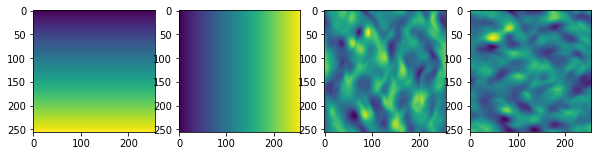

In [218]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(x)
plt.subplot(142)
plt.imshow(y)
plt.subplot(143)
plt.imshow(u)
plt.subplot(144)
plt.imshow(v)
plt.show()

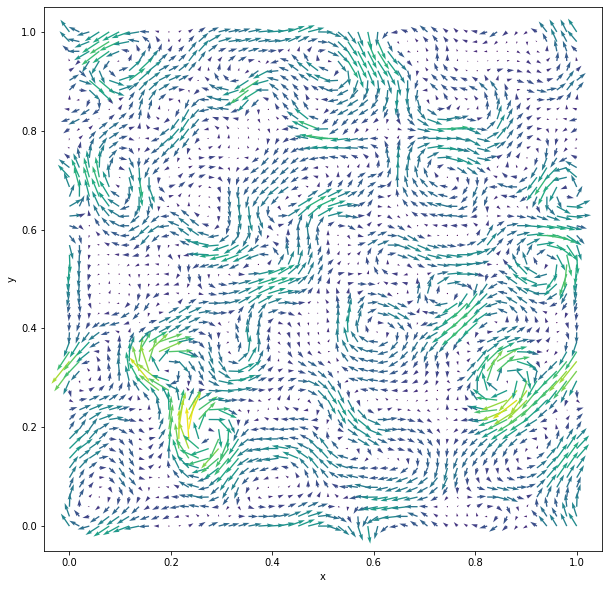

In [237]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
viz.plot_field((x, y), (u, v), step=5, scale=50, ax=ax, indexing='ij')
plt.show()

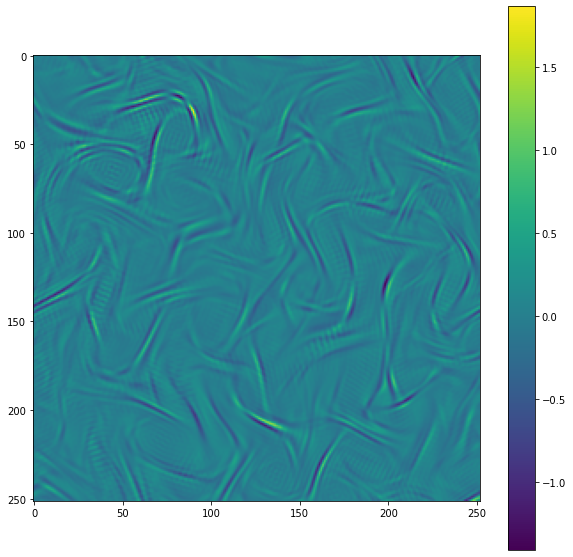

In [220]:
d = phy.compute_divergence((x,y),(u,v), indexing='ij')

plt.figure(figsize=(10,10))
plt.imshow(d[2:-2,2:-2])
plt.colorbar()
plt.show()

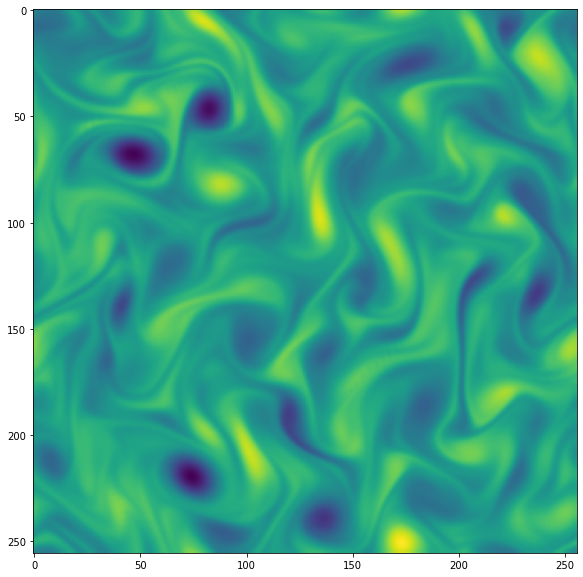

In [221]:
fig, ax = plt.subplots(figsize=(10,10))
w = phy.compute_vorticity((x,y),(u,v), indexing='ij')
plt.imshow(w)
plt.show()

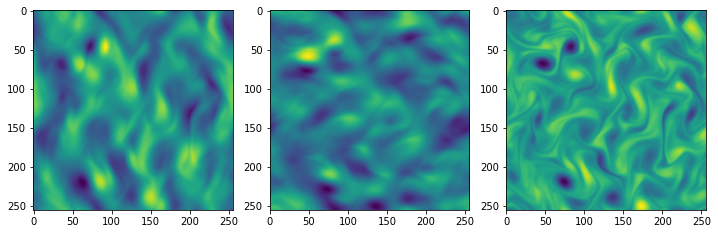

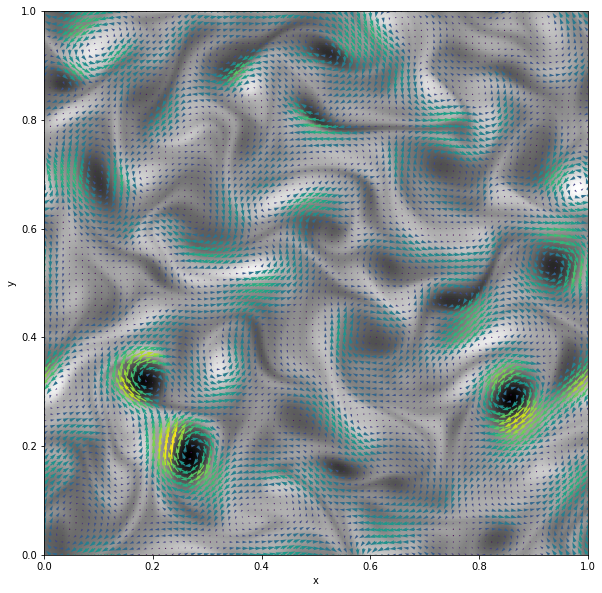

In [222]:
w = phy.compute_vorticity((x,y), (u,v), indexing='ij')

figsize=(10,10)

fig, ax = plt.subplots(1,3,figsize=figsize)
ax[0].imshow(u)
ax[1].imshow(v)
ax[2].imshow(w)
plt.tight_layout()
plt.show()

s = 5
scale = 50
fig, ax = plt.subplots(figsize=figsize)
viz.plot_field((x, y), (u, v), vorticity_img=w, step=3, scale=100, ax=ax)
plt.show()

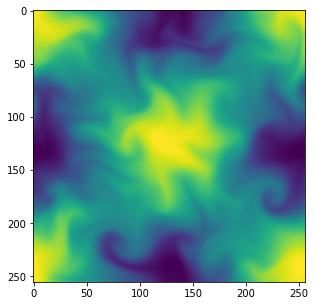

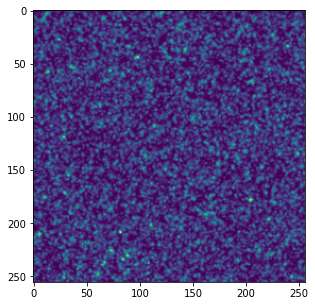

In [224]:
turb2D.load_data(12)
plt.figure(figsize=(5,5))
plt.imshow(turb2D.scalar)

plt.figure(figsize=(5,5))
plt.imshow(turb2D.particle)

In [231]:
fig, axarr = plt.subplots(1,1, figsize=(10,10))

ims = []
for i in tqdm(range(100)):
    
    turb2D.load_data(i)
    sc = turb2D.scalar
    sc = np.concatenate([sc, sc], axis=0)
    sc = np.concatenate([sc, sc], axis=1)
    im1 = axarr.imshow(sc, animated=True)
    
    ims.append([im1])
    
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)

plt.close()

# Show the animation
HTML(ani.to_html5_video())

  0%|          | 0/50 [00:00<?, ?it/s]

In [264]:
from turboflow.dataloaders import Turb2DDataset

data_dir = pathlib.Path('..','.cache','Turb2D.hdf5')
td = Turbo2DDataset(data_dir, time_idx=20, ds=4)

torch.Size([4096, 2])
torch.Size([4096, 2])
4096


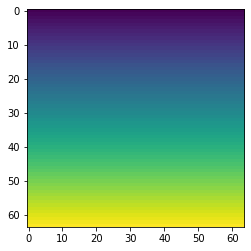

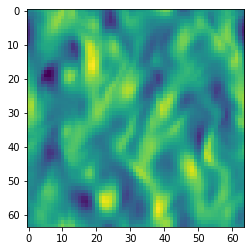

In [262]:
X, y = td[:]
print(X.shape)
print(y.shape)
print(len(td))

plt.imshow(X[:,0].reshape(*td.img_shape))
plt.show()
plt.imshow(y[:,0].reshape(*td.img_shape))
plt.show()

## PROCESS FILES
### Extract TEXT (X,Y,U,V)

In [ ]:
# img_dir = '../../../Datasets/2021-Turb2D/shifttruth1000-txt.txt/'
# imgs = sorted(glob.glob(img_dir + '*.txt'))

# nimgs = len(imgs)

# Turb2D = np.zeros((nimgs,256,256,4))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = np.loadtxt(open(img_path, "rb"))
#     for v in range(4):
#         Turb2D[i,:,:,v] = img[:,v].reshape(256,256)

# outfile = '../data/2021-Turb2D_velocities.npy'
# np.save(outfile, Turb2D)

### Extract Particles

In [ ]:
# img_dir = '../../../Datasets/2021-Turb2D/particle/'
# imgs = sorted(glob.glob(img_dir + '*.tif'))

# nimgs = len(imgs)

# Turbo2DParticles = np.zeros((nimgs, 256,256))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = plt.imread(img_path)
#     Turbo2DParticles[i,:,:] = img

# outfile = '../data/2021-Turb2D_particles.npy'
# np.save(outfile, Turbo2DParticles)

## Extract Scalar

In [ ]:
# img_dir = '../../../Datasets/2021-Turb2D/scalar/'
# imgs = sorted(glob.glob(img_dir + '*.tif'))

# nimgs = len(imgs)

# Turbo2DScalar = np.zeros((nimgs, 256,256))

# for i, img_path in enumerate(tqdm(imgs)):
#     img = plt.imread(img_path)
#     Turbo2DScalar[i,:,:] = img

# outfile = '../data/2021-Turb2D_scalar.npy'
# np.save(outfile, Turbo2DScalar)

## Visualize Data

In [ ]:
Velocities = np.load('../data/2021-Turb2D_velocities.npy')
Scalars = np.load('../data/2021-Turb2D_scalar.npy')
Particles = np.load('../data/2021-Turb2D_particles.npy')

In [ ]:
img = 10

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(Velocities[img,:,:,0])
plt.subplot(222)
plt.imshow(Velocities[img,:,:,1])
plt.subplot(223)
plt.imshow(Velocities[img,:,:,2])
plt.subplot(224)
plt.imshow(Velocities[img,:,:,3])

plt.figure(figsize=(5,5))
plt.imshow(Scalars[img,:,:])

plt.figure(figsize=(5,5))
plt.imshow(Particles[img,:,:])

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(10,10))

ims = []
for i in tqdm(range(100)):
       
    im1 = axarr[0].imshow(Scalars[i,:,:], animated=True)
    im2 = axarr[1].imshow(Particles[i,:,:], animated=True)
    
    ims.append([im1, im2])
    
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)

plt.close()

# Show the animation
HTML(ani.to_html5_video())

## Process Data

In [ ]:
from turboflow.utils import physics as ph

In [ ]:
n = 10

U = Velocities[n,:,:,2]
V = Velocities[n,:,:,3]

# attention might be V <-> U

vorticity = ph.compute_vorticity(U, V)

plt.figure(figsize=(5,5))
plt.imshow(vorticity.T)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ph.plot_field(V, U, step=5, scale=1, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ph.plot_field(V, U, step=5, scale=1, img=vorticity, ax=ax)
plt.show()

In [ ]:
fig, axarr = plt.subplots(figsize=(10,10))

ims = []
for i in tqdm(range(100)):
    
    U = Velocities[i,:,:,2]
    V = Velocities[i,:,:,3]

#     vorticity = ph.compute_vorticity(U, V)
       
    im1 = ph.plot_field(V, U, step=5, scale=1, ax=axarr)
    
    ims.append([im1])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

plt.close()

# Show the animation
HTML(ani.to_html5_video())